<a href="https://colab.research.google.com/github/Max091531/retail_sales_analysis/blob/main/retail_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar

In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['gender'] = df['gender'].astype('category')
df['prodect_category'] = df['product_category'].astype('category')

In [ ]:
df1 = df.copy()

In [ ]:
df['gender'].value_counts()

Female    510
Male      490
Name: gender, dtype: int64

<Axes: ylabel='gender'>

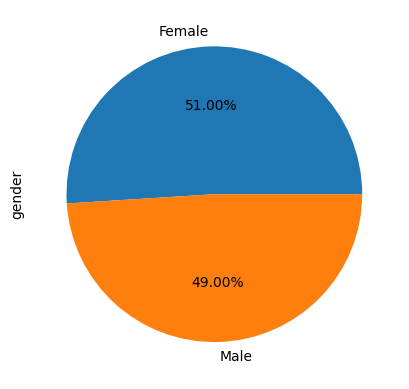

In [ ]:
df1['gender'].value_counts().plot(kind='pie', autopct = '%.2f%%')

# the above plot shows among the genders female purchasing behviour goes high

In [ ]:
df1['product_category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: product_category, dtype: int64

<Axes: >

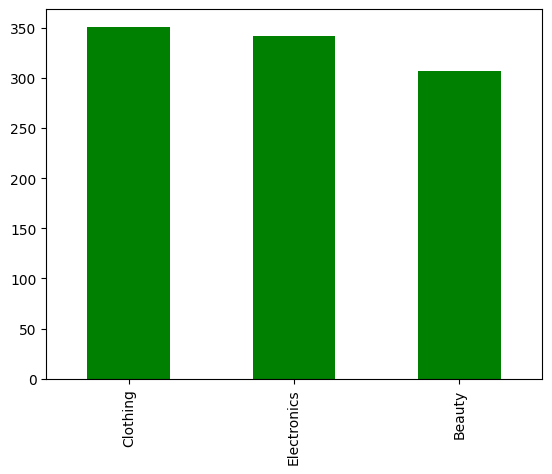

In [ ]:
df1['product_category'].value_counts().plot(kind='bar', color = 'green')  # another method

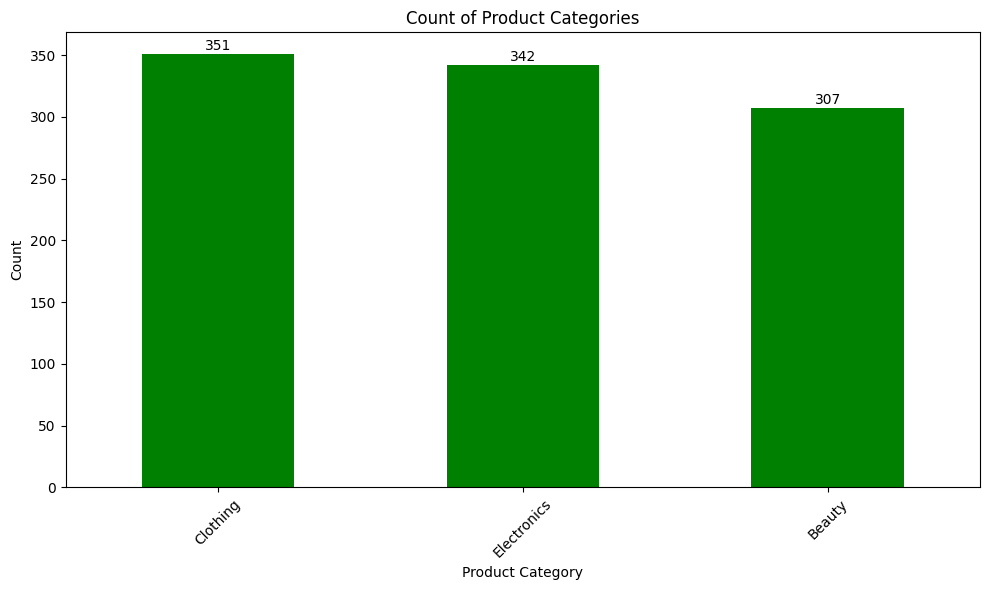

In [ ]:
counts_pc = df1['product_category'].value_counts()
plt.figure(figsize=(10, 6))
barPlot = counts_pc.plot(kind = 'bar', color = 'green')

for index, value in enumerate(counts_pc):
  barPlot.text(index, value+1, str(value), ha='center', va='bottom')

plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Product Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# People tend to buy clothing more according to the given insights

<Axes: ylabel='Frequency'>

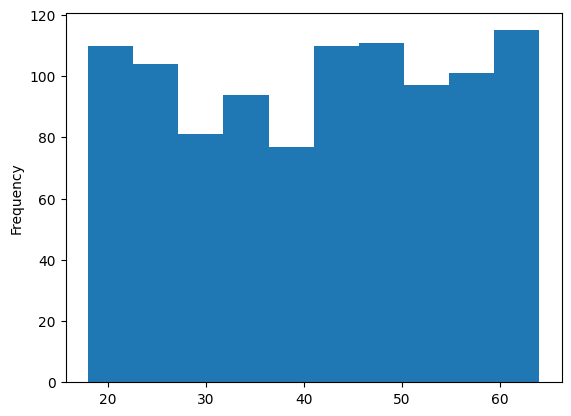

In [ ]:
df1['age'].plot(kind = 'hist')

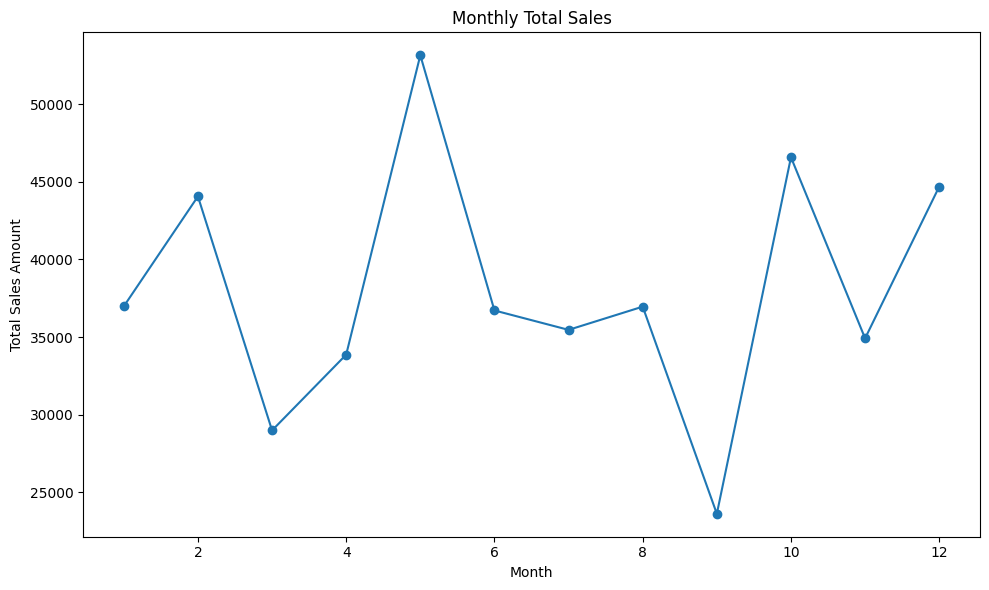

In [ ]:
# Time series analysis
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['total_amount'].sum()

# Visualize using a line plot or bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Total Sales')

plt.tight_layout()
plt.show()


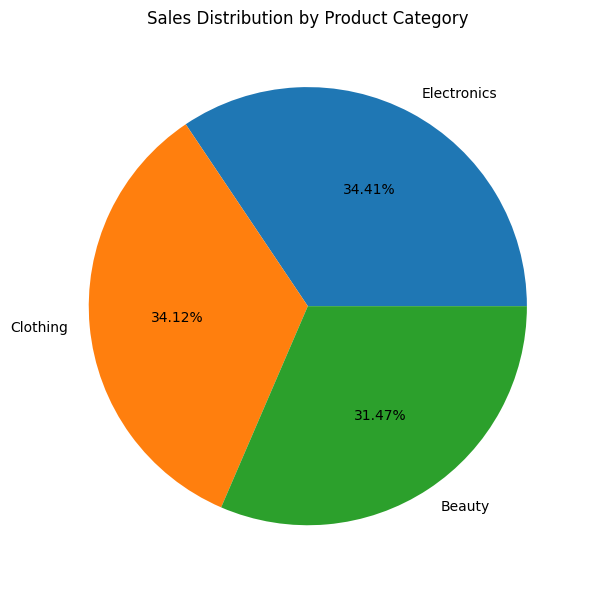

In [ ]:
# Total sales amount by product category
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

# Visualize using a pie chart or bar chart
plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie', autopct='%.2f%%')
plt.title('Sales Distribution by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


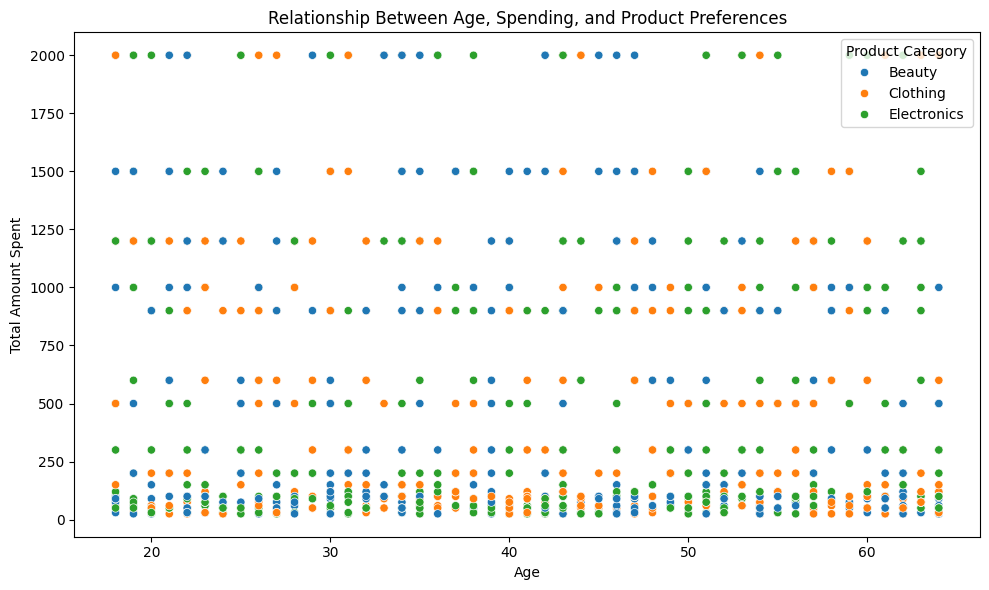

In [ ]:
# Scatter plot or correlation analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_amount', hue='product_category', data=df)
plt.xlabel('Age')
plt.ylabel('Total Amount Spent')
plt.title('Relationship Between Age, Spending, and Product Preferences')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


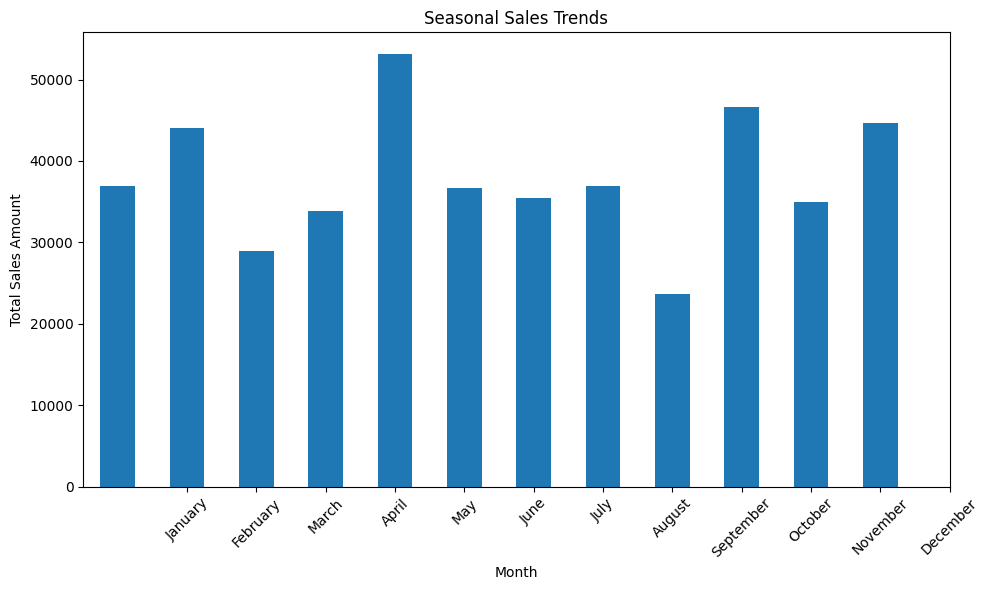

In [ ]:
# Seasonal sales analysis
seasonal_sales = df.groupby(df['date'].dt.month)['total_amount'].sum()

# Visualize using a bar chart or line plot
plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Seasonal Sales Trends')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.tight_layout()
plt.show()


#Distinct Purchasing Behaviors Based on Items Bought per Transaction:

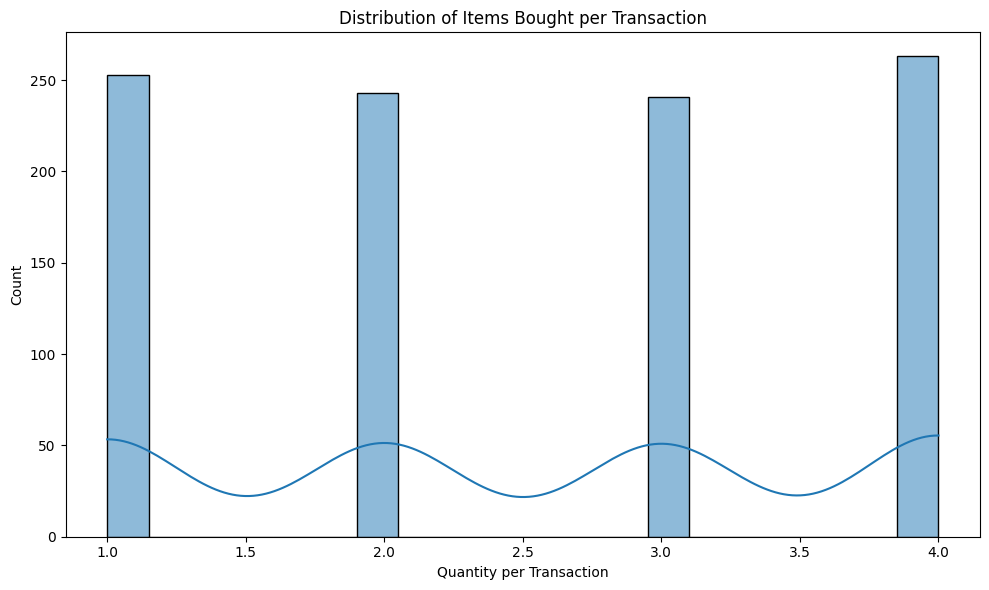

In [ ]:
# Distribution of quantity per transaction
plt.figure(figsize=(10, 6))
sns.histplot(df['quantity'], bins=20, kde=True)
plt.xlabel('Quantity per Transaction')
plt.ylabel('Count')
plt.title('Distribution of Items Bought per Transaction')
plt.tight_layout()
plt.show()


# Insights from Product Price Distribution within Each Category:

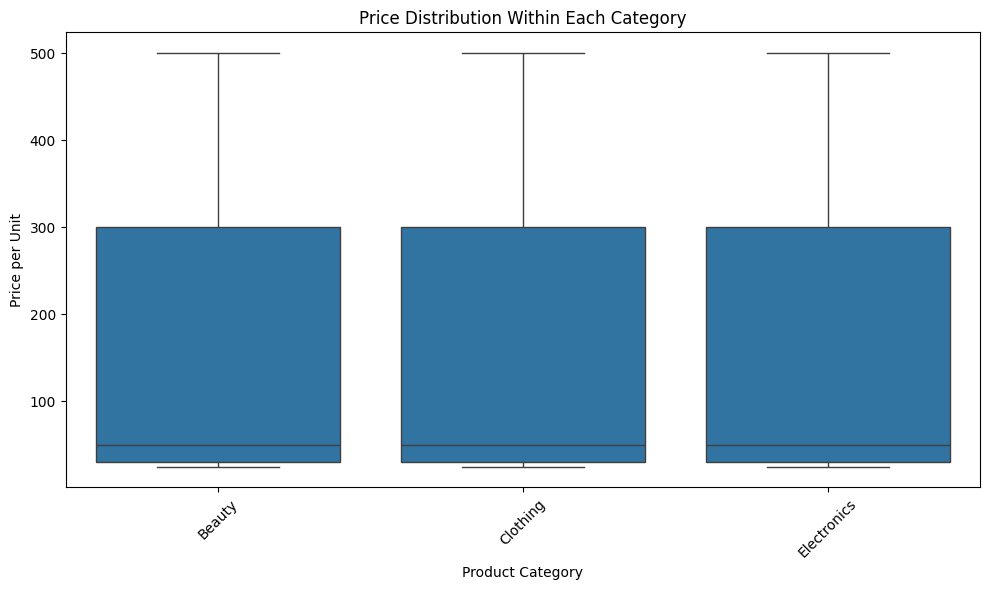

In [ ]:
# Price distribution by product category
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category', y='price_per_unit', data=df)
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.title('Price Distribution Within Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
